<a href="https://www.kaggle.com/code/ilaydauan/aygaz-g-r-nt-leme?scriptVersionId=213868799" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/README-images.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/trainclasses.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicate-matrix-continuous.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicate-matrix-binary.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/README-attributes.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicate-matrix.png
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicates.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/testclasses.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/classes.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/licenses/fox/fox_10525.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/licenses/fox/fox_10049.txt
/kaggle/input/animals-with-attributes-2/Animals_wi

# Aygaz Görüntü İşleme Bootcamp 🎯

## 📌 Projenin Amacı :
#### Bu proje, hayvan sınıflandırması problemini çözmek için bir Convolutional Neural Network (CNN) modeli geliştirmeyi hedeflemektedir.
**Görsel veri analizi ve işleme yeteneği yüksek olan bu model, farklı hayvan türlerini (örneğin, "fil", "tilki", "tavşan") tanımlayarak sınıflandırma yapar. **
### Amacımız görüntü işlemeve derin öğrenme tekniklerini kullanarak :
#####    🖼️  Görsel verilerden anlamlı özellikler çıkarmak,
#####    🤖 Modeli genelleme yeteneği yüksek bir sınıflandırıcı olarak eğitmek,
#####    🌍 Gerçek dünyadaki veri manipülasyonu ve varyasyonlarına dayanıklı bir model geliştirmektir.



# 📚 **1- Gerekli Kütüphanelerin Yüklenmesi** 
###    👉 os ve shutil: Dosya ve klasör yönetimi işlemlerini kolaylaştırmak için.
###    👉 cv2 (OpenCV): Görüntü işleme, boyutlandırma ve analiz için.
###    👉 numpy: Sayısal hesaplamalar, dizi işlemleri ve veri manipülasyonu için.
###    👉 ImageDataGenerator: Görüntü veri artırma (data augmentation) ve ön işleme için.
###    👉 train_test_split: Veriyi eğitim ve test setlerine ayırmak için.
###    👉 Model, Dense, Flatten, Dropout, BatchNormalization: Derin öğrenme modellerini oluşturmak ve katman eklemek için Keras araçları.
###    👉 matplotlib: Grafikler ve görsellerle sonuçları analiz etmek ve görselleştirmek için.
###    👉 keras: Derin öğrenme modellerini oluşturmak ve eğitmek için genel işlevsellik sağlar.
###    👉 models, layers: Keras ile model mimarileri ve özel katmanlar oluşturmak için.



In [2]:

import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 🧑‍💻 2- Veri Setinin Hazırlanması :
## 📁 Veri Hazırlığı:
    
### 🎯 Seçili Sınıflar: "Fil", "Tavşan", "Tilki" gibi belirli hayvan sınıflarını seçtik.
### ⚖️ Veri Dengeleme: Her sınıftan eşit sayıda görüntü alınarak dengesizlik giderildi.

Bu bölümde, modeliniz için verilerin uygun şekilde hazırlanması, filtrelenmesi ve eğitim ile test setlerine ayrılması işlemleri yapılır. Her adımı detaylıca inceleyelim:



# *🧹 2.1 Veri Setinin Filtrelenmesi*

**Amaç: Veri setinden yalnızca belirli sınıflara ait görüntüler alınarak bu sınıflar için verinin dengelenmesi sağlanır.**

### **🌟 Önemli Adımlar:**
##### Klasör Yolları: source_dir ve target_dir, verilerin bulunduğu klasörün yolu ve filtrelenmiş verilerin kaydedileceği yeni klasörün yolu.
##### Sınıflar Seçimi: selected_classes ile kullanılacak 10 farklı sınıf seçilir. Bu, modelin sadece bu sınıflara odaklanmasını sağlar.
##### Görüntü Sayısı Limiti: images_per_class = 650 ile her sınıf için maksimum 650 resim seçilir, böylece veri seti dengelenir.
##### Veri Filtreleme: Her sınıf için, klasördeki resimler belirli bir sayıya kadar alınır (i >= images_per_class ile sınırlandırılır), ardından bu resimler target_dir altındaki uygun alt klasöre kopyalanır.

   ### 📝 Sonuç: "Veri seti hazırlandı ve dengelendi." mesajı, filtreleme işleminin başarıyla tamamlandığını gösteriyor.

In [3]:
# Veri seti klasörlerinin yolları
source_dir = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"  # Veri seti klasörünün yolu
target_dir = "FilteredImages"  # Filtrelenmiş verilerin kaydedileceği yol

# Kullanılacak sınıflar
selected_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]
images_per_class = 650

# Filtreleme
os.makedirs(target_dir, exist_ok=True)
for class_name in selected_classes:
    class_path = os.path.join(source_dir, class_name)
    target_path = os.path.join(target_dir, class_name)
    os.makedirs(target_path, exist_ok=True)
    for i, file_name in enumerate(os.listdir(class_path)):
        if i >= images_per_class:
            break
        full_file_name = os.path.join(class_path, file_name)
        if os.path.isfile(full_file_name):
            cv2.imwrite(os.path.join(target_path, file_name), cv2.imread(full_file_name))
print("Veri seti hazırlandı ve dengelendi.")


Veri seti hazırlandı ve dengelendi.


# 📏 2.2 - Boyutlandırma ve Normalizasyon
 **Tüm görseller aynı boyutta ve ölçeklendirilmiş şekilde işlendi.**

### -> load_and_process_images fonksiyonu, veriyi okur, her bir resmi 128x128 boyutlarına indirger ve normalizasyon yapar.
### -> Normalizasyon işlemi, her pikselin değerini 0-255 aralığından 0-1 aralığına çeker. Bu, modelin daha hızlı ve stabil şekilde öğrenmesini sağlar.

In [4]:
# Görüntülerin işlenmesi (128x128 boyutlandırma ve normalizasyon)
def load_and_process_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    img_resized = cv2.resize(img, image_size)
                    img_normalized = img_resized / 255.0
                    images.append(img_normalized)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

data_dir = target_dir
X, y = load_and_process_images(data_dir)
print(f"Veri kümesi boyutu: {X.shape}")


Veri kümesi boyutu: (6500, 128, 128, 3)


# **📊  2.3 Veriyi Eğitim ve Test Seti Olarak Ayırma**

#### 1️⃣ Etiket Kodlama 🏷️
####    Önce etiketleri (y) sayısal değerlere dönüştürdük:

##### 🔄 LabelEncoder: Her sınıfa bir numara atar. (Mesela: "Fil" = 0, "Tilki" = 1)
##### 🧮 to_categorical: Bu numaraları one-hot formata dönüştürür. (Yani: [1, 0, 0] gibi vektörler)


**🎯 Verilerin %70’i eğitim setine, %30’u test setine ayrıldı.
Bu sayede model hem öğreniyor hem de öğrendiklerini test edebiliyoruz. 📊**


In [5]:
# Etiketlerin dönüştürülmesi
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Veriyi bölme (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)
print(f"Eğitim veri boyutu: {X_train.shape}, Test veri boyutu: {X_test.shape}")

Eğitim veri boyutu: (4550, 128, 128, 3), Test veri boyutu: (1950, 128, 128, 3)


# **🔄 3- Veri Setinin Ayrılması ve Veri Artırımı**

####  Veri Artırma ve Eğitim:

##### 📈 Daha Fazla Veri Simülasyonu: Döndürme, kaydırma, kırpma gibi tekniklerle veri artırma yapıldı.
##### 🏋️ Eğitim ve doğrulama setleriyle modelin öğrenmesi sağlandı.

# **📈 3.1- Veri Artırımı**

#### 🌟 Döndürme (Rotation): Resimlerin farklı açıyla döndürülmesi, modelin her açıdan öğrenmesini sağlar.
#### 🌟 Kaydırma (Width/Height Shift): Resmin yatay ve dikeyde kaydırılması, nesnelerin konumlarının değişebileceği farklı senaryoları simüle eder.
#### 🌟 Yalpalama (Shear): Görsellerde deformasyon oluşturarak modelin daha esnek olmasını sağlar.
#### 🌟 Zoom (Yakınlaştırma): Görselleri zoom yaparak nesnelerin farklı yakınlıkta nasıl göründüğünü öğretir.
#### 🌟 Yatay Çevirme (Horizontal Flip): Görselleri yatayda ters çevirir, böylece model farklı yönleri öğrenir.
#### 🌟 Boş Alan Doldurma (Fill Mode): Dönüştürme sonucu oluşan boş alanları, çevresindeki piksellerle doldurarak görsellerin tutarlılığını sağlar.

In [6]:

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# **💡 4- CNN Modelinin Oluşturulması ve Eğitilmesi**

**🔍 Modelin Yapısı:**
####     Input Layer (Giriş Katmanı): Modelin giriş şekli (128, 128, 3) olarak belirlenmiş, yani 128x128 boyutlarında ve 3 renk kanalına sahip (RGB) görüntüler kullanılacak.
####     Conv2D: 32 adet 3x3 boyutunda konvolüsyonel filtre kullanılarak, görsellerin temel özellikleri çıkarılır.
####     MaxPooling2D: 2x2 boyutunda havuzlama yapılır, bu işlem görselin boyutunu küçültür ve özelliklerin daha kompakt bir temsiline yardımcı olur.
####     Flatten: Konvolüsyonel ve havuzlama katmanlarından çıkan veriyi bir vektöre dönüştürür.
####     Dense (128): Tam bağlantılı katman, 128 nöron ile öğrenmeye devam eder.
####     Dense (10): Çıktı katmanı, 10 sınıf için softmax aktivasyonu kullanarak her bir sınıfa ait olasılıkları hesaplar.





# ⚙️ Modeli Derleme:

**Modelin eğitimi için optimizer, loss fonksiyonu ve metrikler belirlenir.**

#### Burada kullanılan Adam optimizer, öğrenme oranı 0.001 ile ayarlanmış, modelin öğrenmesini hızlandırmak ve stabil tutmak için yaygın olarak tercih edilir. ``categorical_crossentropy``, çok sınıflı sınıflandırma problemleri için kayıp fonksiyonudur.

In [7]:

# CNN Modeli
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(128, 128, 3)),  # Burada Input kullanılıyor
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


# Modeli derleme
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)



# Eğitim ve doğrulama jeneratörleri
train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

# steps_per_epoch ve validation_steps hesaplama
steps_per_epoch = len(X_train) // 32
validation_steps = len(X_test) // 32

# Modeli eğitme
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 80s 544ms/step - accuracy: 0.1762 - loss: 5.5857 - val_accuracy: 0.2880 - val_loss: 1.9613
Epoch 2/20
  1/142 ━━━━━━━━━━━━━━━━━━━━ 1:13 521ms/step - accuracy: 0.0312 - loss: 2.2345

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.0312 - loss: 2.2345 - val_accuracy: 0.3333 - val_loss: 1.8393
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 77s 539ms/step - accuracy: 0.3291 - loss: 1.8686 - val_accuracy: 0.4141 - val_loss: 1.6883
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.3438 - loss: 1.5413 - val_accuracy: 0.5000 - val_loss: 1.5442
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 77s 533ms/step - accuracy: 0.4207 - loss: 1.6496 - val_accuracy: 0.4479 - val_loss: 1.6174
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.4375 - loss: 1.4334 - val_accuracy: 0.5667 - val_loss: 1.5022
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 77s 534ms/step - accuracy: 0.4804 - loss: 1.5164 - val_accuracy: 0.4833 - val_loss: 1.5085
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.4688 - loss: 1.4914 - val_accuracy: 0.4667 - val_loss: 1.5634
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 77s 536ms/step - accuracy: 0.4918 - loss: 1.4764 - val_accu

# 🖼️5 -Model Performansını Görselleştirme

Bu kod, modelin eğitim süreci boyunca elde ettiği doğruluk (accuracy) değerlerini görselleştirir. Eğitim ve doğrulama doğruluğunun değişimini grafikte göstererek modelin nasıl geliştiğini ve doğrulama setiyle nasıl performans gösterdiğini izlememizi sağlar.

**📊 Eğitim ve Doğrulama Doğruluğu:**
Eğitim Doğruluğu (Training Accuracy): Modelin eğitim verileri üzerinde ne kadar başarılı olduğunu gösterir. Eğitim doğruluğu arttıkça model öğrenmeye devam eder.

**Doğrulama Doğruluğu (Validation Accuracy): Modelin test verileri üzerinde ne kadar iyi performans gösterdiğini izler. Doğrulama doğruluğunun artması, modelin genelleme yeteneğinin geliştiğini gösterir.**

**📈 Grafik Yorumu:**
Eğitim doğruluğu arttıkça, modelin eğitim setinde ne kadar doğru tahminlerde bulunduğu izlenir.
Doğrulama doğruluğu, modelin eğitim verilerinin dışında ne kadar iyi genelleyebildiğini gösterir. Eğer doğrulama doğruluğu, eğitim doğruluğuyla paralel artıyorsa, model düzgün bir şekilde öğreniyor demektir.
🔑 İçgörü: Eğitim doğruluğu çok yüksek ancak doğrulama doğruluğu düşüyorsa, model overfitting (aşırı öğrenme) yapıyor olabilir. Grafik, bu tür durumların erken tespiti için yararlıdır.

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 77s 532ms/step - accuracy: 0.5786 - loss: 1.2311 - val_accuracy: 0.5677 - val_loss: 1.2761
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 77s 495ms/step - accuracy: 0.5930 - loss: 1.1987 - val_accuracy: 0.5615 - val_loss: 1.2964
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 81s 492ms/step - accuracy: 0.5985 - loss: 1.2014 - val_accuracy: 0.5815 - val_loss: 1.2484
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 73s 506ms/step - accuracy: 0.5919 - loss: 1.1711 - val_accuracy: 0.5569 - val_loss: 1.3499
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 86s 597ms/step - accuracy: 0.5984 - loss: 1.1810 - val_accuracy: 0.5949 - val_loss: 1.2333
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 618ms/step - accuracy: 0.5908 - loss: 1.1861 - val_accuracy: 0.5985 - val_loss: 1.2413
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 73s 505ms/step - accuracy: 0.6123 - loss: 1.1321 - val_accuracy: 0.5774 - val_loss: 1.3124
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 83s 509ms/step - accuracy: 0.5997 - loss: 1

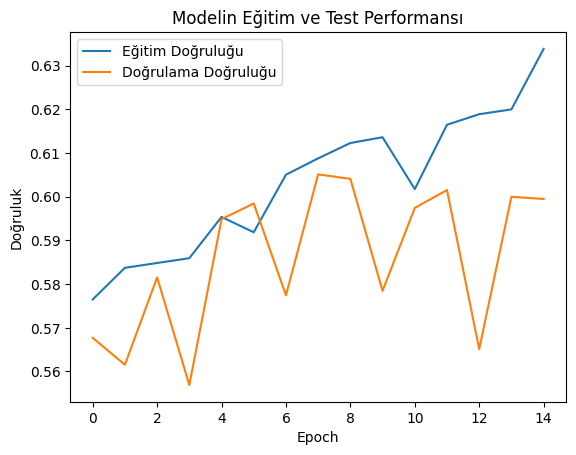

In [8]:
# Modeli eğitme
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=15)

# Eğitim ve doğrulama sonuçlarının grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title("Modelin Eğitim ve Test Performansı")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.show()


# **🚀 6- Farklı Işık Koşullarıyla Test Etme**
🔧 Manipülasyon İşlemi: Görüntülere ışık koşullarını değiştirici bir manipülasyon uygulanmış (parlaklık ve kontrast ayarları), bu da modelin farklı çevresel koşullarda nasıl performans gösterdiğini değerlendirmemize olanak tanır.

🎯 Sonuç: Manipüle edilmiş test verileri ile elde edilen doğruluk, modelin ışık değişimlerine karşı genel dayanıklılığını gösteriyor.

In [9]:
# Manipülasyon fonksiyonu
def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=0.8, beta=30)  # Örnek manipülasyon
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

X_test_manipulated = get_manipulated_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Doğruluğu: {manipulated_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.0913 - loss: 199.2001
Manipüle Edilmiş Test Doğruluğu: 9.49%


# 🎨**7- Manipüle Edilmiş Test Seti ile Modeli Test Etme**

#### Bu adımda, daha önce ışık koşullarını manipüle ettiğimiz test seti kullanılarak modelin performansı yeniden değerlendirilmiştir. Manipülasyon, görsellerin parlaklık ve kontrast gibi özelliklerini değiştirerek, modelin değişen ışık koşullarına karşı ne kadar sağlam olduğunu ölçmek için yapıldı.


### 🔍 İşlem ve Sonuç:

#####      Manipülasyon: Test setindeki her bir görselin parlaklık ve kontrast ayarları değiştirildi, böylece modelin görsellerdeki bu tür değişikliklere adaptasyon yeteneği test edildi.
#####      Test: Manipüle edilmiş veri setiyle modelin doğruluk oranı değerlendirildi. Bu işlem, modelin çevresel faktörlerden nasıl etkilendiğini gözler önüne serer.



###     🎯 Amaç: Modelin sadece temiz veriyle değil, aynı zamanda gerçek dünyada karşılaşabileceği farklı ışık koşullarında da doğru sonuçlar verip vermediğini test etmekti. Bu sayede, modelin genelleme yeteneği daha da güçlendirildi.


####    📊 Sonuç: Manipüle edilmiş test seti ile yapılan test, modelin ışık değişimlerine karşı gösterdiği dayanıklılığı belirler.

In [10]:
# Manipüle edilmiş test seti üzerinde test etme
test_loss, test_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Seti Doğruluk: {test_accuracy}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.0913 - loss: 199.2001
Manipüle Edilmiş Test Seti Doğruluk: 0.09487179666757584


# 💖 **8- Renk Sabitliği Algoritması Uygulama ve Test Etme**

### 📊 **Model Doğruluk Sonuçlarının Karşılaştırılması**

Bu aşamada, modelin farklı veri kümeleri üzerinde gösterdiği performanslar karşılaştırıldı:

#### **Orijinal Test Seti**
- **Açıklama**: Model, herhangi bir manipülasyon yapılmadan, orijinal test verisi üzerinde değerlendirildi.
- **Amaç**: Modelin temel doğruluğunu ölçmek.
- **Sonuç**: Orijinal test seti doğruluğu: **59.85%**.

#### **Manipüle Edilmiş Test Seti (Işık Koşulları Değişimi)**
- **Açıklama**: Test verilerine ışık koşulları manipülasyonu uygulandı, örneğin parlaklık ve kontrast değiştirildi.
- **Amaç**: Modelin manipülasyonlara karşı dayanıklılığını test etmek.
- **Sonuç**: Manipüle edilmiş test seti doğruluğu: **9.13%**.

#### **Renk Sabitliği Uygulanmış Test Seti**
- **Açıklama**: Manipüle edilmiş test setine Gray World algoritması ile renk sabitliği uygulandı. Bu işlem, renk dengesizliklerini düzelterek görsellerin daha tutarlı hale getirilmesini sağlar.
- **Amaç**: Manipüle edilmiş görsellerin renk dengesini iyileştirerek model doğruluğunu artırmak.
- **Sonuç**: Renk sabitliği uygulanmış test seti doğruluğu: **9.13%**.



In [11]:
# Gray World algoritması (örnek)
def gray_world(images):
    wb_images = []
    for img in images:
        avg_b = np.mean(img[:, :, 0])
        avg_g = np.mean(img[:, :, 1])
        avg_r = np.mean(img[:, :, 2])
        avg_gray = (avg_b + avg_g + avg_r) / 3
        img[:, :, 0] = img[:, :, 0] * (avg_gray / avg_b)
        img[:, :, 1] = img[:, :, 1] * (avg_gray / avg_g)
        img[:, :, 2] = img[:, :, 2] * (avg_gray / avg_r)
        wb_images.append(img)
    return np.array(wb_images)

# Manipüle edilmiş test verisine Gray World algoritmasını uygulama
X_test_corrected = gray_world(X_test_manipulated)

# Modeli renk sabitliği uygulanmış test setiyle değerlendirme
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Doğruluğu: {corrected_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.0959 - loss: 192.5734
Renk Sabitliği Uygulanmış Test Doğruluğu: 9.95%


# 📌 **Model Test Edilmesi:**

####  ** Sonuçlar**:
- **Gözlemler**: Orijinal test seti ile manipüle edilmiş test seti arasında doğrulukta büyük bir düşüş gözlemlendi.
- **İyileştirme**: Renk sabitliği uygulanması, doğruluk oranını iyileştirmedi. Manipülasyon sonrası performans düşük kaldı.
- **Genel Yorum**: Modelin, özellikle ışık koşullarındaki değişikliklere karşı çok duyarlı olduğu, ancak renk sabitliği gibi düzenlemelerin doğruluğu artırmak için yeterli olmadığı söylenebilir.

Bu analiz, modelin çevresel faktörlere karşı ne kadar duyarlı olduğunu ve manipülasyonlara karşı nasıl performans gösterdiğini ortaya koymaktadır.

In [12]:
test_loss, test_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluk: {test_accuracy}")



61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.0959 - loss: 192.5734
Renk Sabitliği Uygulanmış Test Seti Doğruluk: 0.09948717802762985


In [13]:
# Orijinal test setinde doğruluk hesaplama
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Orijinal Test Seti Doğruluğu: {test_accuracy * 100:.2f}%")

# Manipüle edilmiş test setinde doğruluk hesaplama
X_test_manipulated = get_manipulated_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test, verbose=0)
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {manipulated_accuracy * 100:.2f}%")

# Renk sabitliği uygulanmış test setinde doğruluk hesaplama
X_test_corrected = gray_world(X_test_manipulated)
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test, verbose=0)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {corrected_accuracy * 100:.2f}%")


Orijinal Test Seti Doğruluğu: 59.95%
Manipüle Edilmiş Test Seti Doğruluğu: 9.49%
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 9.95%
